# Item analysis
We calculate the following metrics for every questionnaire:
- Item difficulty
    - $IF = \frac{N_{\text{correct}}}{N_{\text{total}}}$
    - $B-index=IF_{\text{pass}}-IF_{\text{fail}}$
- Item discrimination
    - $ID = IF_{\text{upper}}-IF_{\text{lower}}$
- Distractor efficiency
    - (no enough data)

In [6]:
# We first calculate IF for each test item.
# Item difficulty between .30-.70 is good (Brown, J.D., 2005, p.76)
import pandas as pd
import os

# concatenate all results
df_list = []
for file in os.listdir('../data/'):
    if file.startswith('q'):
        tmp_df = pd.read_excel('../data/'+file)
        tmp_df['问卷']=file[1]
        df_list.append(tmp_df)
df = pd.concat(df_list, ignore_index=True)
print('**********')

# calculate IF for each item (CIV, DV, MPV, ISV, IV, MV) and get the item discrimination (ID)
def get_if(df=df, num_participants=42):
    if_dict = dict()
    for item in ['CIV','DV','MPV','ISV','IV','MV']:
        correct_num = int(df[item].sum())
        item_difficulty = correct_num/(num_participants*2)
        if_dict[item] = item_difficulty
    return if_dict
if_dict = get_if(df,42) # we hired 42 participants, each test item has 2 questions
print("Item difficulties (IF):")
for k,v in if_dict.items():
    print(f"{k}: {v:.2f}")
print('**********')

# split the students into two groups: upper 50% and lower 50% (for B-index)
# split the students into three groups: tier1, tier2, tier3 (for ID)
median_score = df['总分'].median()
df['group'] = df['总分'].apply(lambda x: 'upper' if x >= median_score else 'lower')
df['group2'] = pd.qcut(df['总分'], 3, labels=['tier1', 'tier2', 'tier3'], duplicates='drop')

# calculate B-index (IF pass - IF fail), assuming 50% of the students passed
ifs = df.groupby('group').apply(lambda g: get_if(g, 21))
print("B-indexes for each item:")
for key in ifs['upper']:
    difference = ifs['upper'][key] - ifs['lower'][key]
    print(f"{key}: {difference:.2f}")
print('**********')

# calculate item discrimination (ID)
if_low_dict = get_if(df[df['group2'] == 'tier1'],20)
if_high_dict = get_if(df[df['group2'] == 'tier3'],8)
print("Item discrimination (ID) for each item:")
for key in if_low_dict.keys():
    difference = if_high_dict[key] - if_low_dict[key]
    print(f"{key}: {difference:.2f}")
print('**********')


**********
Item difficulties (IF):
CIV: 0.73
DV: 0.88
MPV: 0.81
ISV: 0.94
IV: 0.90
MV: 0.87
**********
B-indexes for each item:
CIV: 0.50
DV: 0.29
MPV: 0.19
ISV: 0.17
IV: 0.19
MV: 0.31
**********
Item discrimination (ID) for each item:
CIV: 0.50
DV: 0.22
MPV: 0.25
ISV: 0.10
IV: 0.15
MV: 0.25
**********


/var/folders/85/h9zn7p197rv7q9qq734vvvsr0000gn/T/ipykernel_59338/3062487920.py:37: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ifs = df.groupby('group').apply(lambda g: get_if(g, 21))


# Test analysis
We calculate the reliability metrics for the whole test:
- Parallel/Alternate Forms reliability (Pearson correlation between the observed test scores.)

*We did not choose IRT due to the limit in sample size

### Questionnaire correlation


Correlation Matrix (Pearson):
          Q1        Q2        Q3        Q4
Q1  1.000000  0.102835  0.353640  0.413829
Q2  0.102835  1.000000 -0.088501  0.233644
Q3  0.353640 -0.088501  1.000000  0.613182
Q4  0.413829  0.233644  0.613182  1.000000


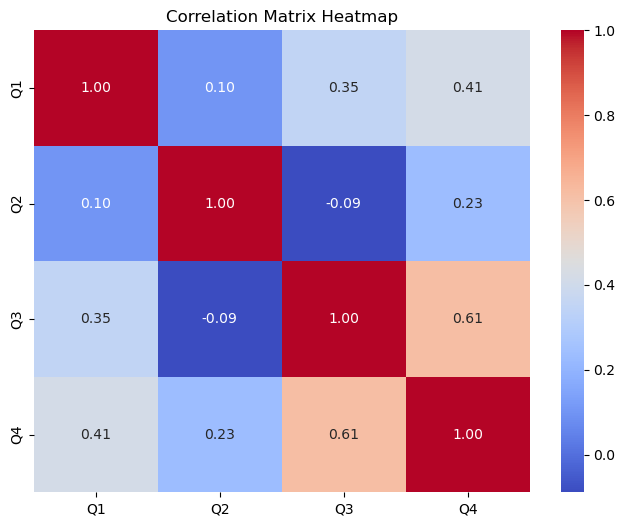

<Figure size 1200x600 with 0 Axes>

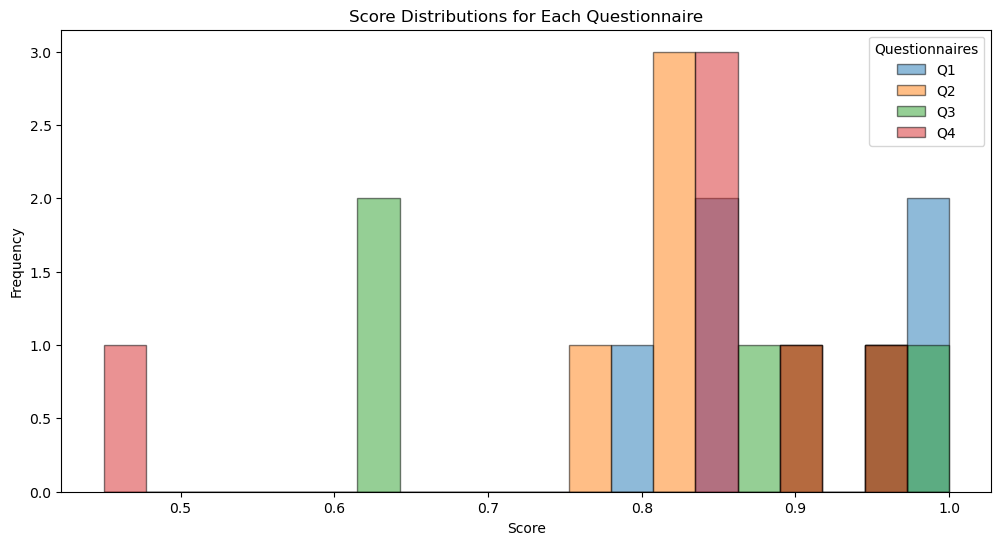

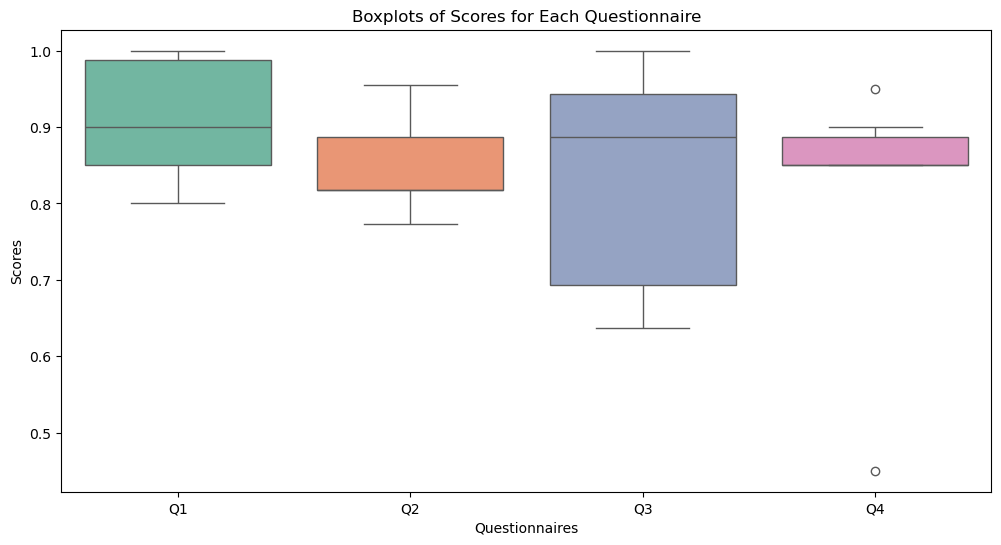

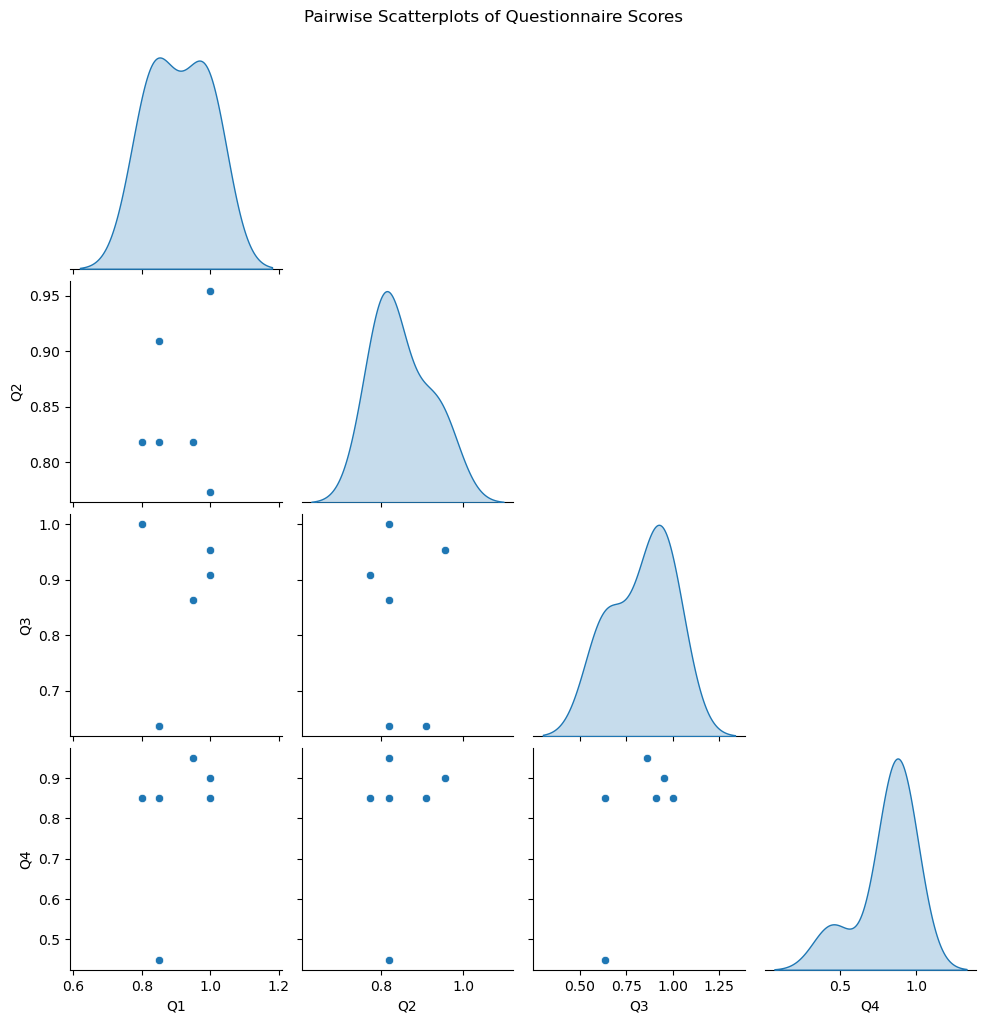

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

scores_df = pd.read_excel('../data/accuracy.xlsx')[['CIV','DV','MPV','ISV','IV','MV']].T
scores_df.columns = ['Q1','Q2','Q3','Q4']

# correlation matrix
correlation_matrix = scores_df.corr()
print("\nCorrelation Matrix (Pearson):")
print(correlation_matrix)

# correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# distributions of scores for each questionnaire
plt.figure(figsize=(12, 6))
scores_df.plot(kind='hist', alpha=0.5, bins=20, edgecolor='black', figsize=(12, 6))
plt.title("Score Distributions for Each Questionnaire")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend(title="Questionnaires")
plt.show()

# boxplots for each questionnaire
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df, palette="Set2")
plt.title("Boxplots of Scores for Each Questionnaire")
plt.xlabel("Questionnaires")
plt.ylabel("Scores")
plt.show()

# pairwise scatterplots
sns.pairplot(scores_df, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Scatterplots of Questionnaire Scores", y=1.02)
plt.show()

### Phenomena correlation


Correlation Matrix (Pearson):
          CIV        DV       MPV       ISV        IV        MV
CIV  1.000000  0.208722  0.282986 -0.345010  0.897116 -0.396895
DV   0.208722  1.000000 -0.350375  0.649343  0.604451  0.060135
MPV  0.282986 -0.350375  1.000000  0.094442 -0.023860 -0.955460
ISV -0.345010  0.649343  0.094442  1.000000 -0.061535 -0.281200
IV   0.897116  0.604451 -0.023860 -0.061535  1.000000 -0.189598
MV  -0.396895  0.060135 -0.955460 -0.281200 -0.189598  1.000000


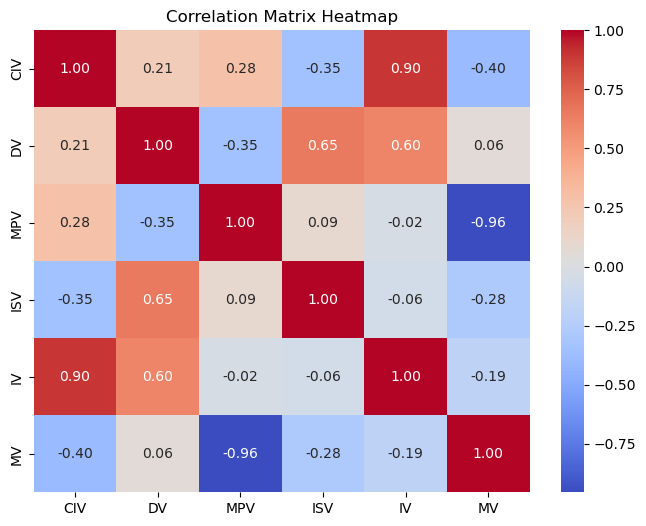

<Figure size 1200x600 with 0 Axes>

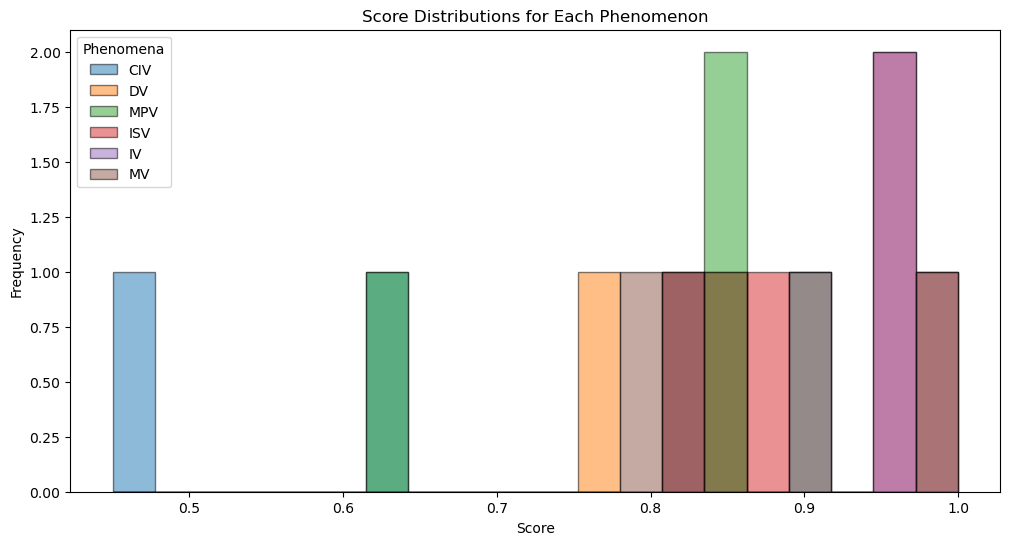

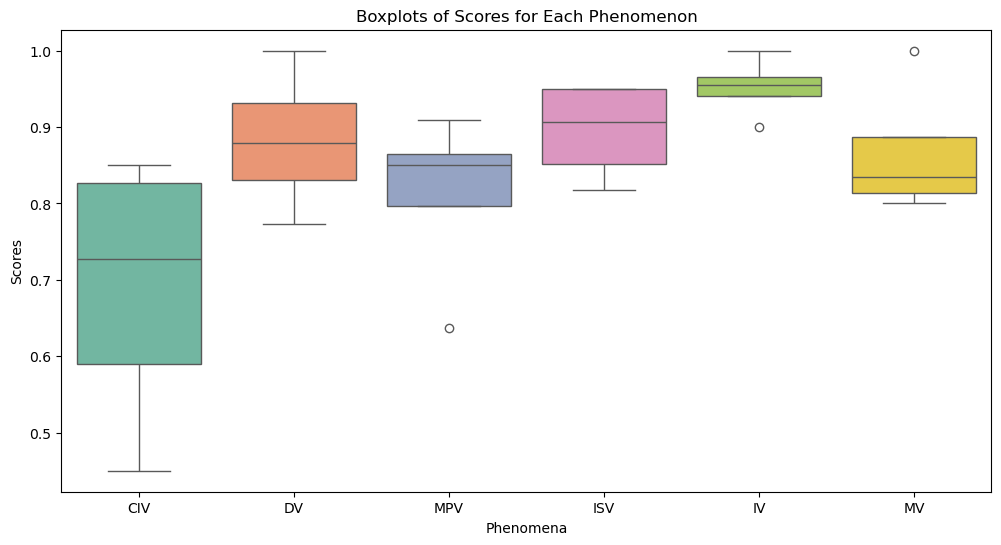

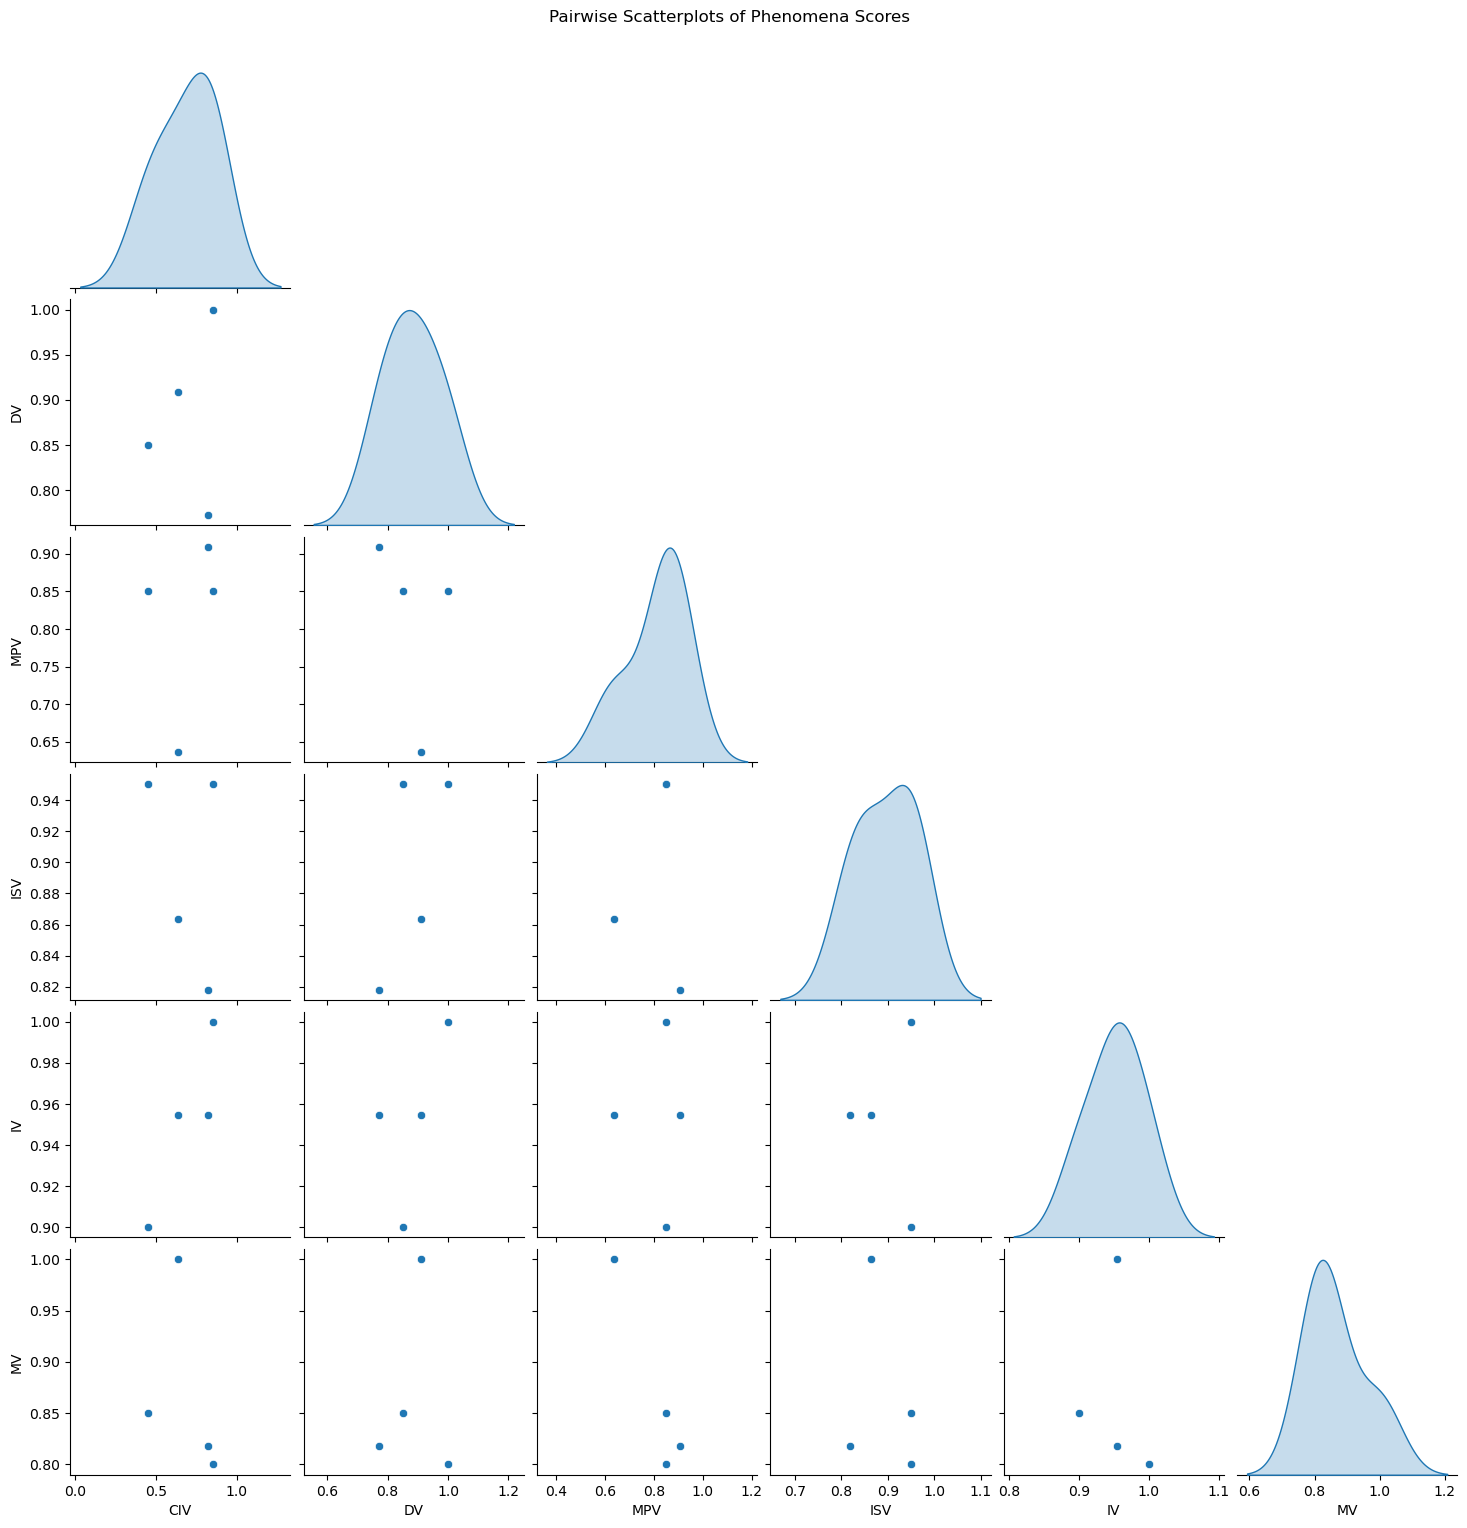

In [3]:
scores_df = pd.read_excel('../data/accuracy.xlsx')[['CIV','DV','MPV','ISV','IV','MV']]

# correlation matrix
correlation_matrix = scores_df.corr()
print("\nCorrelation Matrix (Pearson):")
print(correlation_matrix)

# correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# distributions of scores for each phenomenon
plt.figure(figsize=(12, 6))
scores_df.plot(kind='hist', alpha=0.5, bins=20, edgecolor='black', figsize=(12, 6))
plt.title("Score Distributions for Each Phenomenon")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend(title="Phenomena")
plt.show()

# boxplots for each questionnaire
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores_df, palette="Set2")
plt.title("Boxplots of Scores for Each Phenomenon")
plt.xlabel("Phenomena")
plt.ylabel("Scores")
plt.show()

# pairwise scatterplots
sns.pairplot(scores_df, diag_kind="kde", corner=True)
plt.suptitle("Pairwise Scatterplots of Phenomena Scores", y=1.02)
plt.show()

### ANOVA

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
scores_df = pd.read_excel('../data/accuracy.xlsx')[['CIV','DV','MPV','ISV','IV','MV']]

# melt data for ANOVA
df_long = scores_df.melt(var_name='题型', value_name='得分')
df_long.head()

# fit data using OLS
model = ols('得分 ~ C(题型)', data=df_long).fit()

# ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

            sum_sq    df         F    PR(>F)
C(题型)     0.165730   5.0  2.761084  0.050694
Residual  0.216085  18.0       NaN       NaN


In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
scores_df = pd.read_excel('../data/accuracy.xlsx')[['CIV','DV','MPV','ISV','IV','MV']].T
scores_df.columns = ['Q1','Q2','Q3','Q4']
# melt data for ANOVA
df_long = scores_df.melt(var_name='问卷', value_name='得分')
df_long.head()

# fit data using OLS
model = ols('得分 ~ C(问卷)', data=df_long).fit()

# ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
print(anova_results)

            sum_sq    df         F    PR(>F)
C(问卷)     0.032510   3.0  0.620478  0.609922
Residual  0.349304  20.0       NaN       NaN
